# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [76]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [5]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [6]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Answer: The data are tables with string containing the states including DC and a National roundup. There is a participation rate in string form. There are also what appear to be mean scores for each subject area, including the cumulative total. 

#### 4a. Does the data look complete? 

Answer: Yes, given a lack of Null/NAN values.

In [7]:
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [8]:
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [9]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [10]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [13]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: I will need to convert the percenage columns into scaled 0-1.0 decimals from strings. Composite score of SATs is an object which means there's some strings in there.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#define a function to take a string with a number
#followed by a % sign, strip the % and convert it to
#an int
def str_percentage_to_int(string):
    return(int(string.replace("%","")))
    

In [15]:
act_2017['Participation'] = act_2017['Participation'].apply(str_percentage_to_int)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [16]:
sat_2017['Participation'] = sat_2017['Participation'].apply(str_percentage_to_int)
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#code adapted from Cameron's tutorial on cleaning data

for idx, val in act_2017['Composite'].iteritems():
    if type(val) != float:
        try:
            act_2017.loc[idx, 'Composite'] = float(val)
        except:
            print(f'{idx}: {val}')

51: 20.2x


In [18]:
act_2017.loc[51, 'Composite'] = 20.2  

In [19]:
type(act_2017.loc[51, 'Composite'])

float

In [20]:
#code adapted from Cameron's tutorial on cleaning data
#check again!

for idx, val in act_2017['Composite'].iteritems():
    if type(val) != float:
        try:
            act_2017.loc[idx, 'Composite'] = float(val)
        except:
            print(f'{idx}: {val}')

In [21]:
act_2017.dtypes

#something didn't work!

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [22]:
#cast the whole column using .astype
act_2017['Composite'] = act_2017['Composite'].astype(dtype='float64')

In [23]:
act_2017.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [24]:
#code
act_2017.columns = act_2017.columns.str.lower()
sat_2017.columns = sat_2017.columns.str.lower()

In [25]:
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [26]:
sat_2017.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

- Display the data types again to confirm they are correct.

In [27]:
#Code:
act_2017.dtypes

state             object
participation      int64
english          float64
math             float64
reading          float64
science          float64
composite        float64
dtype: object

In [28]:
sat_2017.dtypes

state                                 object
participation                          int64
evidence-based reading and writing     int64
math                                   int64
total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [29]:
#remap the column names to allow for future comingling
# of data and easier readability
act_2017.rename(columns={
    'state': 'state',
    'participation': 'act_participation_rate_2017',
    'english':'act_english_2017',
    'math':'act_math_2017',
    'reading':'act_reading_2017',
    'science':'act_science_2017',
    'composite':'act_composite_2017'
}, inplace=True)

sat_2017.rename(columns={
    'state':'state',
    'participation':'sat_participation_rate_2017',
    'evidence-based reading and writing':'sat_reading_writing_2017',
    'math':'sat_math_2017',
    'total':'sat_composite_2017'
}, inplace=True)    

In [30]:
act_2017.columns

Index(['state', 'act_participation_rate_2017', 'act_english_2017',
       'act_math_2017', 'act_reading_2017', 'act_science_2017',
       'act_composite_2017'],
      dtype='object')

In [31]:
sat_2017.columns

Index(['state', 'sat_participation_rate_2017', 'sat_reading_writing_2017',
       'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example|
state|object|both|The name of the state that the data refers to
act_participation_rate_2017|float|ACT|The percentage rate of participation
act_english_2017|float|ACT|The average score for the English subtest in 2017
act_math_2017|float|ACT|The average score for the Math subtest in 2017

    'reading':'act_reading_2017',
    'science':'act_science_2017',
    'composite':'act_composite_2017'
        'state':'state',
    'participation':'sat_participation_rate_2017',
    'evidence-based reading and writing':'sat_reading_writing_2017',
    'math':'sat_math_2017',
    'total':'sat_composite_2017'


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
#code
act_2017.drop([0], inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [33]:
#Code:
combined_2017 = act_2017.merge(sat_2017,left_on='state', right_on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
#code
combined_2017.to_csv("../data/combined_2017.csv", index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [35]:
act_2018 = pd.read_csv("../data/act_2018.csv")
sat_2018 = pd.read_csv("../data/sat_2018.csv")

In [36]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [37]:
#convert participation rates into ints
act_2018['Participation'] = act_2018['Participation'].apply(str_percentage_to_int)

In [38]:
#chance column names to lowercase and co-existence with other columns
act_2018.rename(columns={
    'State': 'state',
    'Participation': 'act_participation_rate_2018',
    'Composite':'act_composite_2018'
}, inplace=True)



In [39]:
#check datatypes - all looks good!
act_2018.dtypes

state                           object
act_participation_rate_2018      int64
act_composite_2018             float64
dtype: object

In [40]:
act_2018.head()
act_2018.shape

(52, 3)

In [41]:
act_2018['state'].value_counts()
#There are two Maines!

Maine                   2
Ohio                    1
Nevada                  1
Illinois                1
Kansas                  1
Missouri                1
Indiana                 1
New Hampshire           1
Vermont                 1
Pennsylvania            1
District of columbia    1
Delaware                1
Arizona                 1
Iowa                    1
South Dakota            1
Michigan                1
New Mexico              1
Kentucky                1
South Carolina          1
Montana                 1
New York                1
Oklahoma                1
North Dakota            1
North Carolina          1
Virginia                1
Georgia                 1
Maryland                1
Oregon                  1
Hawaii                  1
Washington              1
Wisconsin               1
Idaho                   1
Minnesota               1
Alabama                 1
Massachusetts           1
Texas                   1
New Jersey              1
Rhode Island            1
Colorado    

In [42]:
#check to see what data is there
act_2018[act_2018['state'] == 'Maine']

,state,act_participation_rate_2018,act_composite_2018
19,Maine,7,24.0
20,Maine,7,24.0


In [43]:
#drop duplicate values
act_2018.drop_duplicates('state', inplace=True)

In [44]:
act_2018.shape
#now it looks good

(51, 3)

In [45]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [46]:
#convert participation rates into ints
sat_2018['Participation'] = sat_2018['Participation'].apply(str_percentage_to_int)

In [47]:
#chance column names to lowercase and co-existence with other columns

sat_2018.rename(columns={
    'State':'state',
    'Participation':'sat_participation_rate_2018',
    'Evidence-Based Reading and Writing':'sat_reading_writing_2018',
    'Math':'sat_math_2018',
    'Total':'sat_composite_2018'
}, inplace=True)    

In [48]:
#check datatypes - all looks good!
sat_2018.dtypes

state                          object
sat_participation_rate_2018     int64
sat_reading_writing_2018        int64
sat_math_2018                   int64
sat_composite_2018              int64
dtype: object

In [49]:
sat_2018.head()
sat_2018.shape

(51, 5)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [50]:
combined_2018 = act_2018.merge(sat_2018,left_on='state', right_on='state')

In [51]:
combined = combined_2018.merge(combined_2017,left_on='state',right_on='state')

In [52]:
combined.head()

,state,act_participation_rate_2018,act_composite_2018,sat_participation_rate_2018,sat_reading_writing_2018,sat_math_2018,sat_composite_2018,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_rate_2017,sat_reading_writing_2017,sat_math_2017,sat_composite_2017
0,Alabama,100,19.1,6,595,571,1166,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,33,20.8,43,562,544,1106,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,66,19.2,29,577,572,1149,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,19.4,5,592,576,1169,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,27,22.7,60,540,536,1076,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


In [53]:
combined.shape

(50, 17)

In [54]:
combined.to_csv("../data/final.csv", index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
#Code:
combined.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,17,17.0,17.0,17.0,17.0,17,17.0,17.0,17.0,17.0,...,17,17,17.0,17,17.0,17.0,17.0,17,17.0,17
unique,16,16.0,16.0,15.0,16.0,16,14.0,14.0,16.0,16.0,...,16,16,14.0,16,17.0,16.0,16.0,17,14.0,15
top,100,19.8,19.8,19.4,22.7,100,25.6,24.1,19.4,21.4,...,3,100,20.7,100,24.1,23.5,21.9,1086,20.5,100
freq,2,2.0,2.0,2.0,2.0,2,2.0,2.0,2.0,2.0,...,2,2,3.0,2,1.0,2.0,2.0,1,2.0,2


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [56]:
#code
#quick reminder of st dev from https://revisionmaths.com/gcse-maths-revision/statistics-handling-data/standard-deviation

def st_dev(array):
    total= 0
    mean = np.mean(array)
    for n in array:
        total+=(mean - n)**2
    return((total / len(array))**.5)

In [57]:
combined.index = combined['state']
combined.drop(columns = 'state', inplace=True)

In [58]:
combined.T.describe()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000
mean,311.731250,291.900000,302.137500,317.306250,285.562500,301.262500,287.381250,272.800000,289.28125,287.187500,...,325.262500,327.881250,277.850000,301.531250,299.043750,297.912500,289.31250,279.237500,343.662500,331.362500
std,411.753382,385.781442,400.015556,420.256919,375.293757,392.535833,364.705873,347.709187,369.37014,369.671373,...,435.557863,434.848884,359.423036,399.847054,393.497839,390.479234,379.49297,368.037407,457.867033,440.196073
min,5.000000,18.700000,18.600000,3.000000,22.200000,11.000000,24.600000,17.000000,19.00000,20.900000,...,3.000000,5.000000,19.500000,3.000000,23.100000,23.300000,20.90000,14.000000,3.000000,3.000000
25%,19.050000,20.275000,19.800000,19.300000,22.775000,20.875000,25.575000,23.750000,19.87500,21.400000,...,21.725000,19.575000,20.850000,20.200000,23.900000,23.875000,22.07500,20.375000,20.475000,19.950000
50%,59.850000,40.500000,46.000000,59.850000,42.000000,65.000000,65.500000,62.400000,69.50000,58.000000,...,49.650000,60.050000,53.500000,60.400000,44.500000,47.000000,46.50000,46.500000,60.450000,60.400000
75%,577.250000,544.750000,565.250000,592.500000,532.250000,538.000000,521.750000,494.750000,527.25000,525.250000,...,613.500000,611.000000,512.250000,551.000000,556.000000,552.750000,538.75000,516.750000,643.750000,625.250000
max,1166.000000,1106.000000,1149.000000,1208.000000,1076.000000,1201.000000,1053.000000,998.000000,1099.00000,1064.000000,...,1240.000000,1231.000000,1032.000000,1238.000000,1120.000000,1117.000000,1081.00000,1086.000000,1294.000000,1257.000000


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [59]:

#Code:
sd = {state:st_dev(metric) 
     for state,metric 
     in combined.items()}
sd

{'act_participation_rate_2018': 33.7712540483767,
 'act_composite_2018': 2.090091864009809,
 'sat_participation_rate_2018': 36.72475459414263,
 'sat_reading_writing_2018': 46.537937212558106,
 'sat_math_2018': 46.51518461749884,
 'sat_composite_2018': 91.91248881408882,
 'act_participation_rate_2017': 31.787947401491657,
 'act_english_2017': 2.3009467616613812,
 'act_math_2017': 1.9541504548012678,
 'act_reading_2017': 2.025750231395766,
 'act_science_2017': 3.1630263988781375,
 'act_composite_2017': 1.9840977798485642,
 'sat_participation_rate_2017': 34.21286307808804,
 'sat_reading_writing_2017': 43.9390532442382,
 'sat_math_2017': 84.14399324966696,
 'sat_composite_2017': 89.00941298536914}

In [60]:
#numpy version
sd_np = {state:np.std(metric) 
     for state,metric 
     in combined.items()}
sd_np

{'act_participation_rate_2018': 33.7712540483767,
 'act_composite_2018': 2.090091864009809,
 'sat_participation_rate_2018': 36.72475459414263,
 'sat_reading_writing_2018': 46.537937212558106,
 'sat_math_2018': 46.51518461749884,
 'sat_composite_2018': 91.91248881408882,
 'act_participation_rate_2017': 31.787947401491657,
 'act_english_2017': 2.3009467616613812,
 'act_math_2017': 1.9541504548012678,
 'act_reading_2017': 2.025750231395766,
 'act_science_2017': 3.1630263988781375,
 'act_composite_2017': 1.9840977798485642,
 'sat_participation_rate_2017': 34.21286307808804,
 'sat_reading_writing_2017': 43.9390532442382,
 'sat_math_2017': 84.14399324966696,
 'sat_composite_2017': 89.00941298536914}

In [61]:
combined.describe()

,act_participation_rate_2018,act_composite_2018,sat_participation_rate_2018,sat_reading_writing_2018,sat_math_2018,sat_composite_2018,act_participation_rate_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_rate_2017,sat_reading_writing_2017,sat_math_2017,sat_composite_2017
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,62.320000,21.454000,44.820000,565.020000,557.760000,1122.880000,65.920000,20.862000,21.13600,21.956000,20.992000,21.466000,38.600000,570.860000,549.220000,1129.620000
std,34.114118,2.111312,37.097604,47.010416,46.987432,92.845634,32.110676,2.324307,1.97399,2.046317,3.195139,2.004241,34.560211,44.385146,84.998269,89.913085
min,7.000000,17.700000,2.000000,480.000000,486.000000,998.000000,8.000000,16.300000,18.00000,18.100000,2.300000,17.800000,2.000000,503.000000,52.000000,996.000000
25%,27.750000,19.925000,4.250000,535.000000,524.250000,1062.250000,31.000000,19.000000,19.40000,20.425000,19.900000,19.800000,4.000000,535.250000,523.250000,1057.000000
50%,66.000000,21.050000,50.000000,552.000000,545.500000,1098.500000,71.000000,20.550000,20.90000,21.700000,21.100000,21.400000,34.000000,559.500000,549.500000,1107.500000
75%,100.000000,23.650000,74.500000,612.750000,594.250000,1207.000000,100.000000,23.100000,23.00000,23.875000,22.275000,23.400000,65.000000,613.500000,601.000000,1214.000000
max,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.500000,25.30000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Numpy `std` and my `st_dev()` match but neither matches the PANDAS `.describe()`.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [62]:
combined.columns

Index(['act_participation_rate_2018', 'act_composite_2018',
       'sat_participation_rate_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_composite_2018', 'act_participation_rate_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_rate_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

In [63]:
#code

def max_min(column):
    max_mask = (combined[column] == combined[column].max())
    min_mask = (combined[column] == combined[column].min())
    print(f'States with highest {column} values\n{combined[column][max_mask]}\n--')
    print(f'States with lowest {column} values\n{combined[column][min_mask]}')
    print(f'\n')

In [64]:
#Which states have the highest and lowest participation rates for the:
# 2017 SAT?
max_min('sat_participation_rate_2017')
# 2018 SAT?
max_min('sat_participation_rate_2018')
# 2017 ACT?
max_min('act_participation_rate_2017')
# 2018 ACT?
max_min('act_participation_rate_2018')

States with highest sat_participation_rate_2017 values
state
Connecticut    100
Delaware       100
Michigan       100
Name: sat_participation_rate_2017, dtype: int64
--
States with lowest sat_participation_rate_2017 values
state
Iowa            2
Mississippi     2
North Dakota    2
Name: sat_participation_rate_2017, dtype: int64


States with highest sat_participation_rate_2018 values
state
Colorado       100
Connecticut    100
Delaware       100
Idaho          100
Michigan       100
Name: sat_participation_rate_2018, dtype: int64
--
States with lowest sat_participation_rate_2018 values
state
North Dakota    2
Name: sat_participation_rate_2018, dtype: int64


States with highest act_participation_rate_2017 values
state
Alabama           100
Arkansas          100
Colorado          100
Kentucky          100
Louisiana         100
Minnesota         100
Mississippi       100
Missouri          100
Montana           100
Nevada            100
North Carolina    100
Oklahoma          100
South C

In [65]:
# Which states have the highest and lowest mean total/composite scores for the:
# 2017 SAT?
max_min('sat_composite_2017')
# 2018 SAT?
max_min('sat_composite_2018')
# 2017 ACT?
max_min('act_composite_2017')
# 2018 ACT?
max_min('act_composite_2018')

States with highest sat_composite_2017 values
state
Minnesota    1295
Name: sat_composite_2017, dtype: int64
--
States with lowest sat_composite_2017 values
state
Delaware    996
Name: sat_composite_2017, dtype: int64


States with highest sat_composite_2018 values
state
Minnesota    1298
Name: sat_composite_2018, dtype: int64
--
States with lowest sat_composite_2018 values
state
Delaware    998
Name: sat_composite_2018, dtype: int64


States with highest act_composite_2017 values
state
New Hampshire    25.5
Name: act_composite_2017, dtype: float64
--
States with lowest act_composite_2017 values
state
Nevada    17.8
Name: act_composite_2017, dtype: float64


States with highest act_composite_2018 values
state
Connecticut    25.6
Name: act_composite_2018, dtype: float64
--
States with lowest act_composite_2018 values
state
Nevada    17.7
Name: act_composite_2018, dtype: float64




In [66]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
part_rate_cols = ['sat_participation_rate_2017','sat_participation_rate_2018','act_participation_rate_2017','act_participation_rate_2018']

In [67]:
sat_part_rate_cols = ['sat_participation_rate_2017','sat_participation_rate_2018']
sat_hundo_changed = (
    (combined['sat_participation_rate_2017'] == 100) | (combined['sat_participation_rate_2018'] == 100)
) & (
    (combined['sat_participation_rate_2017']) != (combined['sat_participation_rate_2018'])
    )

combined[sat_part_rate_cols][sat_hundo_changed]

,sat_participation_rate_2017,sat_participation_rate_2018
state,,
Colorado,11,100
Idaho,93,100


In [68]:
act_part_rate_cols = ['act_participation_rate_2017','act_participation_rate_2018']
act_hundo_changed = (
    (combined['act_participation_rate_2017'] == 100) | (combined['act_participation_rate_2018'] == 100)
) & (
    (combined['act_participation_rate_2017']) != (combined['act_participation_rate_2018'])
    )
combined[act_part_rate_cols][act_hundo_changed]

,act_participation_rate_2017,act_participation_rate_2018
state,,
Colorado,100,30
Minnesota,100,99
Nebraska,84,100
Ohio,75,100


In [69]:
# Do any states show have >50% participation on both tests either year?
more_than_50_2017 = (combined['act_participation_rate_2017'] > 50) & (combined['sat_participation_rate_2017'] > 50)
more_than_50_2018 = (combined['act_participation_rate_2018'] > 50) & (combined['sat_participation_rate_2018'] > 50)
combined[act_part_rate_cols + sat_part_rate_cols][more_than_50_2017 | more_than_50_2018]

,act_participation_rate_2017,act_participation_rate_2018,sat_participation_rate_2017,sat_participation_rate_2018
state,,,,
Florida,73,66,83,56
Georgia,55,53,61,70
Hawaii,90,89,55,56
North Carolina,100,100,49,52
South Carolina,100,100,50,55


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

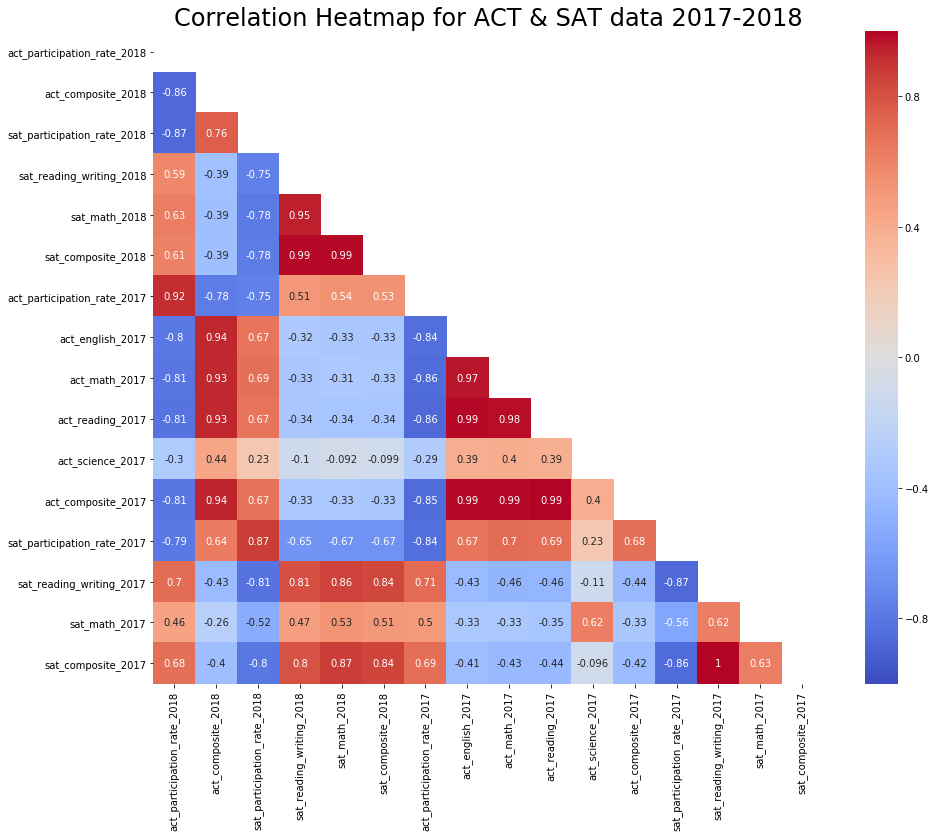

In [81]:
plt.figure(figsize=(15,12))
corr = combined.corr()

#code from riley's lecture to cutoff top of heatmap

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation Heatmap for ACT & SAT data 2017-2018',
         fontsize = 24)

sns.heatmap(corr,
            mask=mask,
           annot=True,
            vmin = -1,
            vmax = 1,
        cmap = "coolwarm"
           );


#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [381]:
## CREATING A DICTIONARY TO REFERENCE FOR VALUE LABELS
global column_desc_dict
descs = ['ACT Participation Rates in 2018',
 'ACT Composite Scores in 2018',
 'SAT Participation Rates in 2018',
 'SAT Reading & Writing Scores in 2018',
 'SAT Math Scores in 2018',
 'SAT Composite Scores in 2018',
 'ACT Participation Rates in 2017',
 'ACT English Scores in 2017',
 'ACT Math Scores in 2017',
 'ACT Reading Scores in 2017',
 'ACT Science Scores in 2017',
 'ACT Composite Scores in 2017',
 'SAT Participation Rates in 2017',
 'SAT Reading & Writing Scores in 2017',
 'SAT Math Scores in 2017',
 'SAT Composite Scores in 2017'
]
column_desc_dict = dict(zip(combined.columns,descs))


In [132]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists

        ax[i].hist(dataframe[column])
        ax[i].set_title(list_of_titles[i],
                       fontsize = 20)
        ax[i].set_xlabel(list_of_xlabels[i],
                        fontsize = 14)
        
        plt.tight_layout()
        
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [130]:
combined.columns

Index(['act_participation_rate_2018', 'act_composite_2018',
       'sat_participation_rate_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_composite_2018', 'act_participation_rate_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_rate_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

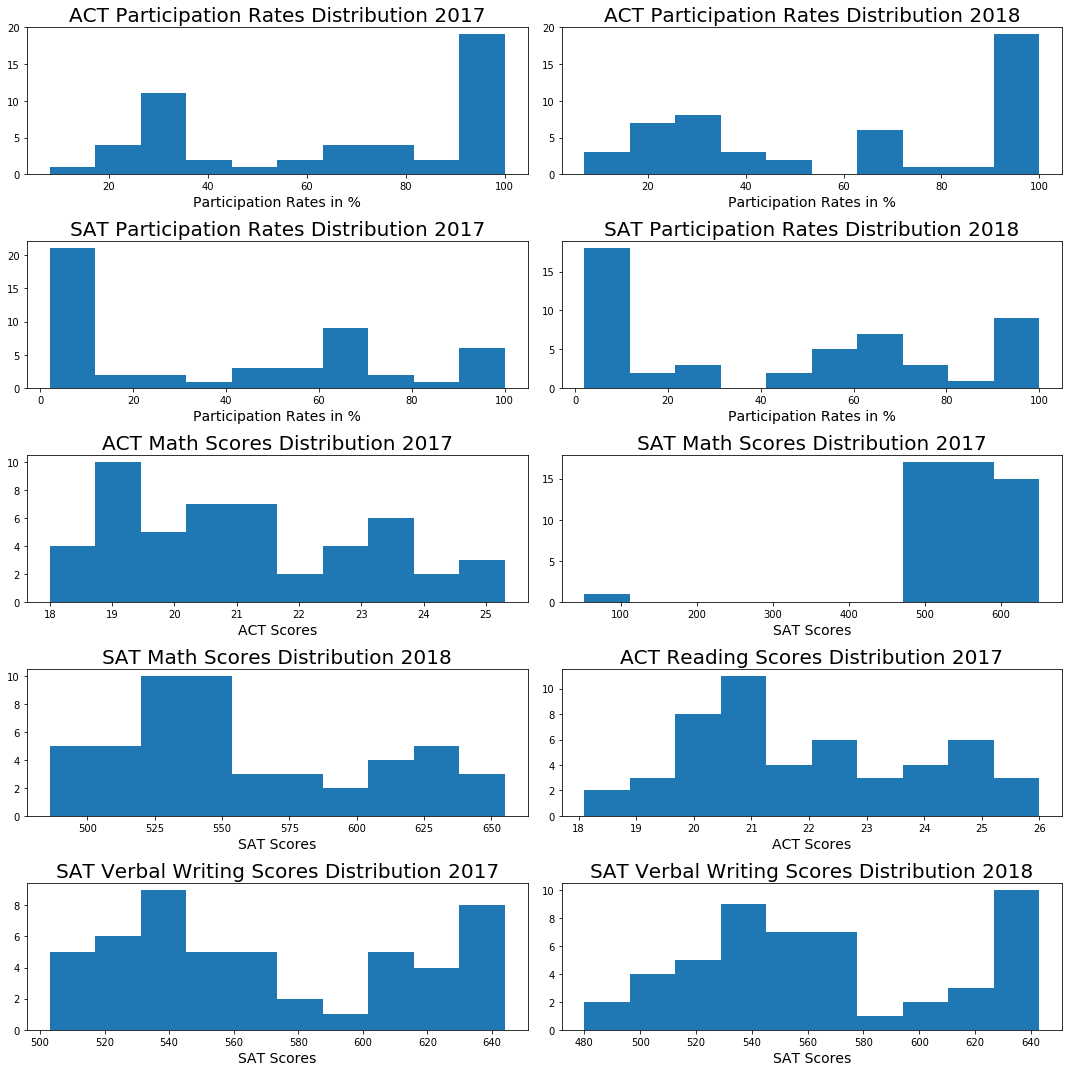

In [131]:
# Code
columns = ['act_participation_rate_2017',
           'act_participation_rate_2018',
           'sat_participation_rate_2017',
           'sat_participation_rate_2018',
           'act_math_2017',
           'sat_math_2017',
           'sat_math_2018',
           'act_reading_2017',
           'sat_reading_writing_2017',
           'sat_reading_writing_2018'
          ]
titles = ['ACT Participation Rates Distribution 2017',
          'ACT Participation Rates Distribution 2018',
          'SAT Participation Rates Distribution 2017',
           'SAT Participation Rates Distribution 2018',
           'ACT Math Scores Distribution 2017',
           'SAT Math Scores Distribution 2017',
           'SAT Math Scores Distribution 2018',
           'ACT Reading Scores Distribution 2017',
           'SAT Verbal Writing Scores Distribution 2017',
           'SAT Verbal Writing Scores Distribution 2018'
        ]
xlabels = ['Participation Rates in %',
         'Participation Rates in %',
         'Participation Rates in %',
         'Participation Rates in %',
         'ACT Scores',
         'SAT Scores',
         'SAT Scores',
           'ACT Scores',
           'SAT Scores',
           'SAT Scores'
           
         ]
subplot_histograms(combined, columns, titles, xlabels);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [170]:
# Code based on previous subplot function
def scatter_subplots(dataframe,scatter_columns):
    ''' scatter_columns is a dictionary
    scatter_dict = {
    'TITLE OF PLOT':[
        ['COLUMN1','COLUMN2' ],
        ['AXIS 1 LABEL','AXIS 2 LABEL' ]
    ],
    ...
    }
    '''
    nrows = int(np.ceil(len(scatter_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, title in enumerate(scatter_columns): # Gives us an index value to get into all our lists
        columns, axes = scatter_columns[title]

        ax[i].scatter(dataframe[columns[0]],dataframe[columns[1]])
        ax[i].set_title(title,
                       fontsize = 20)
        
        plt.tight_layout()
        
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot
combined.columns

Index(['act_participation_rate_2018', 'act_composite_2018',
       'sat_participation_rate_2018', 'sat_reading_writing_2018',
       'sat_math_2018', 'sat_composite_2018', 'act_participation_rate_2017',
       'act_english_2017', 'act_math_2017', 'act_reading_2017',
       'act_science_2017', 'act_composite_2017', 'sat_participation_rate_2017',
       'sat_reading_writing_2017', 'sat_math_2017', 'sat_composite_2017'],
      dtype='object')

In [171]:
scatter_dict = {
    'SAT vs. ACT math scores for 2017':[
        ['sat_math_2017','act_math_2017' ],
        ['SAT Math Scores 2017','ACT Math Scores 2017' ]
    ],
    'SAT vs. ACT verbal/reading scores for 2017':[
        ['sat_reading_writing_2017','act_reading_2017'],
        ['SAT Reading & Writing\nScores 2017','ACT Reading Scores 2017']
    ],
    'SAT vs. ACT total/composite scores for 2017':[
        ['sat_composite_2017','act_composite_2017'],
        ['SAT Total Scores 2017', 'ACT Composite Scores 2017']
    ],
    'Total scores for SAT 2017 vs. 2018':[
        ['sat_composite_2017','sat_composite_2018'],
        ['SAT Total Scores 2017','SAT Total Scores 2018']
    ],
    'Composite scores for ACT 2017 vs. 2018':[
        ['act_composite_2017','act_composite_2018'],
        ['ACT Composite Scores 2017','ACT Composite Scores 2018']
    ]
}

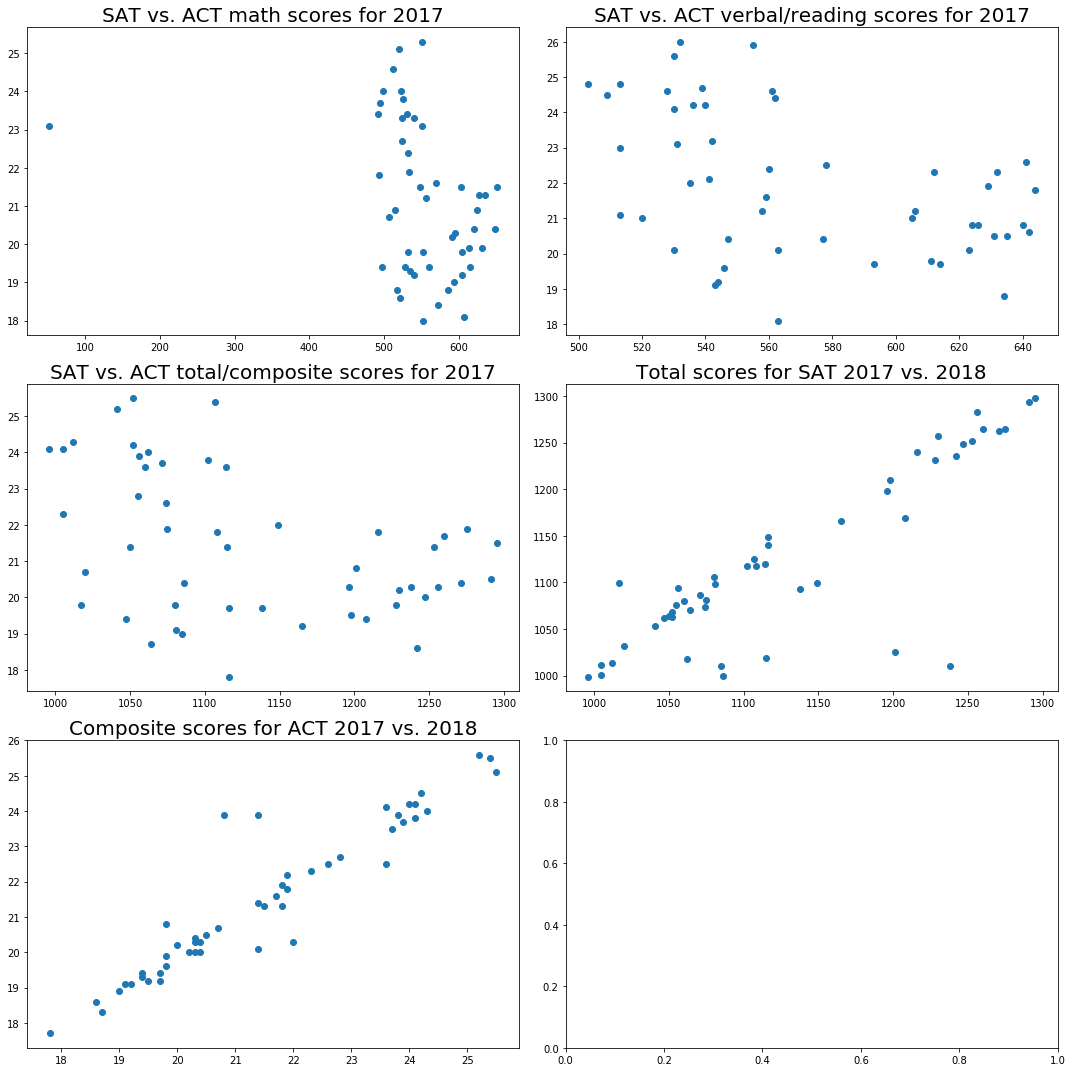

In [172]:
scatter_subplots(combined, scatter_dict)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [409]:
# Code
def boxplot_subplots(dataframe,box_dict):
    ''' box_dict is a dictionary
    box_dict = {
    'TITLE OF PLOT':['COLUMN1','COLUMN2',...,'COLUMNN' ],
    
    ...
    }
    '''
    nrows = int(len(box_dict)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1, figsize=(15,8*nrows)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i,title in enumerate(box_dict):
        cols = box_dict[title] # Gives us an index value to get into all our lists
        redsquare = dict(markerfacecolor='r', marker='s')

        ax[i].boxplot(data=dataframe[cols],
                     flierprops=redsquare,
                      labels = [column_desc_dict[col] for col in cols]
                     )
        ax[i].set_title(title,
                        fontsize = 20,
                       
                        
                       )

        plt.tight_layout()
        
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot
            

In [413]:
box_dict = {
    'Participation Rates':
    ['sat_participation_rate_2017',
     'sat_participation_rate_2018',
     'act_participation_rate_2017',
     'act_participation_rate_2018',
    ],

    
    
    'SAT Math and Verbal Scores':
        ['sat_math_2017',
        'sat_math_2018',
         'sat_reading_writing_2017',
         'sat_reading_writing_2018'
        ]
}
#boxplot_subplots(combined,box_dict);


['SAT Participation Rates in 2017',
 'SAT Participation Rates in 2018',
 'ACT Participation Rates in 2017',
 'ACT Participation Rates in 2018']

ValueError: Dimensions of labels and X must be compatible

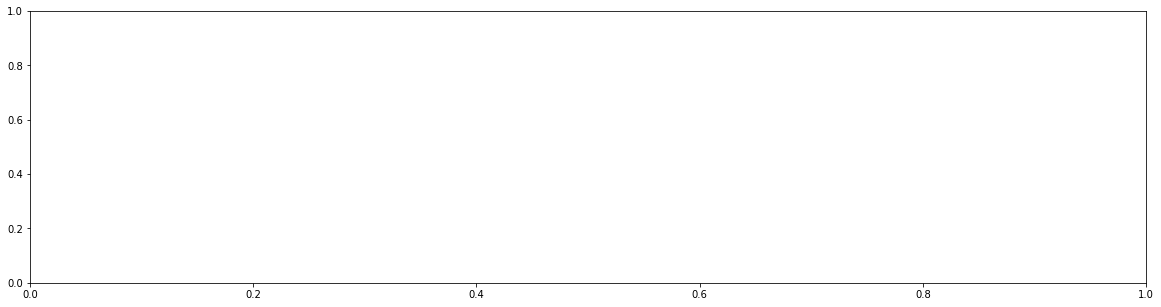

In [415]:

redsquare = dict(markerfacecolor='r', marker='s')
cols = ['sat_participation_rate_2017',
     'sat_participation_rate_2018',
     'act_participation_rate_2017',
     'act_participation_rate_2018'
    ]
plt.figure(figsize=(20,5))
sns.boxplot(data=combined[cols],
                     flierprops=redsquare,
                    labels = [column_desc_dict[col] for col in cols]
            
                     )
#plt.set_title('Test Participation Rates',fontsize = 20,)


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?